[View in Colaboratory](https://colab.research.google.com/github/bagalaster/ethWiCS/blob/master/Engaging_with_Ethucation.ipynb)

In [0]:
# Authors: Matthew King, Megumi Sano, Julia Gong, Ben Newman, and Mac Bagwell

import sklearn as sk
import pandas as pd
import numpy as np

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
!git clone https://github.com/bagalaster/ethWiCS.git

Cloning into 'ethWiCS'...
remote: Counting objects: 35, done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 35 (delta 4), reused 24 (delta 1), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [0]:
# import data
data_orig = pd.read_csv("ethWiCS/xAPI-Edu-Data.csv")

In [17]:
data = pd.get_dummies(data_orig)

# build a simple lasso regression model
reg = sk.linear_model.Lasso(alpha = 0.1)
reg.fit(data["raisedhands"].values.reshape(-1, 1), data["Class_L"])

# predict a value
reg.predict(0)

array([0.65085775])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


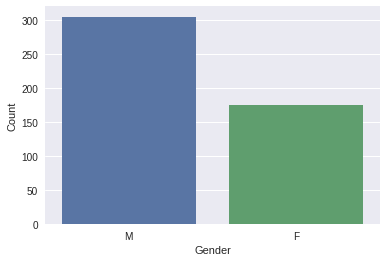

In [15]:
# Visualization
counts = sns.countplot(x = "gender", data=data_orig)
counts.set(xlabel="Gender", ylabel="Count")
plt.show()

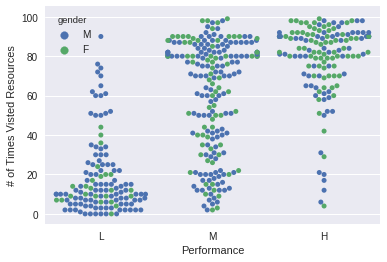

In [13]:
counts = sns.swarmplot(x = "Class", y="VisITedResources", hue="gender", order=["L", "M", "H"], data=data_orig)
counts.set(xlabel="Performance", ylabel="# of Times Visted Resources")
plt.show()

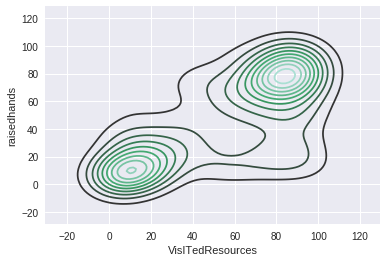

In [14]:
g = sns.kdeplot( data["VisITedResources"], data["raisedhands"])
plt.show()

In [7]:
# Logistic Regression Model
# Average test accuracy: 0.79

# Necessary imports
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# get dummy indicator variables for categorical data
data_dum = pd.get_dummies(data_orig)
data_dum = data_dum.assign(Class = data_orig["Class"])


# split into the training dataset (20%) and the testing dataset (80%)
train, test = train_test_split(data_dum, test_size = 0.2, random_state=42)
train_x = train.drop(["Class_H", "Class_M", "Class_L", "Class"], axis=1)
train_y = train["Class"]
test_x = test.drop(["Class_H", "Class_M", "Class_L", "Class"], axis=1)
test_y = test["Class"]

# train the model
mult_lr3 = linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs").fit(train_x, train_y)

# print out model results
print("Accuracy of model on training data (lbfgs):", metrics.accuracy_score(train_y, mult_lr3.predict(train_x)))
print("Accuracy of model on testing (lbfgs): ", metrics.accuracy_score(test_y, mult_lr3.predict(test_x)))

Accuracy of train (saga): 0.828125
Accuracy of test (saga):  0.7916666666666666


In [21]:
# SVC Model
# Average accuracy: 0.69

import sklearn as sk
import pandas as pd
import numpy as np

from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# read in data
data = data_orig
data_dummy = pd.get_dummies(data)

# train and validate model
classifier = sk.svm.SVC(C=0.45, kernel='poly')
data_final = data_dummy.drop(["Class_L", "Class_H", "Class_M"], 1).join(data["Class"])
train, test = train_test_split(data_final, test_size=0.2)
train_blind = train.drop("Class", 1)
test_blind = test.drop("Class", 1)

classifier.fit(train_blind, train["Class"])
predictions = classifier.predict(test_blind)

accuracy_score(test["Class"], predictions)

0.7708333333333334

In [5]:
# Linear SVC Model
# Average accuracy: 0.75

import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import pandas as pd


# clean the data
df = data_orig
df = df.drop(df.columns[[1, 2, 4, 5, 6, 7, 13]], axis=1)
df = df.replace({\
    'gender':{'M':False, 'F':True},\
    'Relation':{'Father':False, 'Mum':True},\
    'ParentschoolSatisfaction':{'Good':True, 'Bad':False},\
    'StudentAbsenceDays':{'Under-7':False, 'Above-7':True},\
    'Class':{'L':0, 'M':1, 'H':2}
})
df = pd.get_dummies(df, columns=['StageID'])
cls = df['Class']
df.drop(labels=['Class'], axis=1, inplace=True)
df.insert(0,'Class', cls)

#split into X and y train and test data
X, y  = df[df.columns[1:]], np.array(df[df.columns[0]], dtype=str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#define hyperparams for gridsearch
grid = {'loss':['squared_hinge'],\
        'fit_intercept':[True, False],\
        'max_iter':[1000,10000,50000,100000]}

#construct svc model
svc = LinearSVC()
clf = GridSearchCV(svc, param_grid=grid)

#fit the data
clf.fit(X_train, y_train)

#determine accuracy
print (clf.score(X_test, y_test))


0.7604166666666666


In [6]:
# Naive Bayes
# Average accuracy: 0.56

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
data = data_orig #pd.read_csv('xAPI-Edu-Data.csv')
new_data = pd.get_dummies(data)
from sklearn import linear_model
reg = sk.linear_model.Lasso(alpha = 0.1)
reg.fit(new_data["raisedhands"].values.reshape(-1,1),new_data["Class_H"])

data = data.drop(['NationalITy', 'SectionID'], axis = 1)
new_data = pd.get_dummies(data)
new_data

def getThatClass(data):
    data = data.transpose()
    high = data.loc['Class_H']
    low = data.loc['Class_L']
    middle = data.loc['Class_M']
    new_row = []
    for i in range(len(high)):
        if high[i] == 1:
            new_row.append('H')
        if middle[i] == 1:
            new_row.append('M')
        if low[i] == 1:
            new_row.append('L')
    data = data.drop([data.index[len(data)-3], data.index[len(data)-2], data.index[len(data)-1]])
    #drops all three rows?
    new_row_df = pd.DataFrame(new_row)
    new_row_df=new_row_df.transpose()
    data = data.append(new_row_df)
    data = data.transpose()    
    return data
                    

def separateByClass(data):
    separated = {}
    print(len(data))
    for i in range(len(data)):
        row = data.loc[i]
        if row[len(row)-1] not in separated:
            separated[row[len(row) - 1]] = []
        separated[row[len(row)-1]].append(row)
    return separated

data = getThatClass(drop_data)
data_train, data_test = sk.model_selection.train_test_split(data, test_size = 0.2, train_size = 0.8)
yTrain = data_train[0]
yTest = data_test[0]
data_train = data_train.drop([0], axis = 1)
data_test = data_test.drop([0], axis = 1)
clf = MultinomialNB()
clf.fit(data_train, yTrain)
for m in range(20):
    julia = m/float(20)
    averageAccuracy = 0
    for k in range(10):
        MultinomialNB(alpha=julia, class_prior=None, fit_prior=True)
        predictions = (clf.predict(data_test))
        correct = 0
        yList = []
        for j in range(len(yTest)):
            yList.append(yTest.iloc[j][0])
        for i in range(len(predictions)):
            if predictions[i] == yList[i]:
                correct = correct + 1
        averageAccuracy = averageAccuracy + correct / float(len(predictions))
    print(averageAccuracy / float(10))
    
#Now some code for the from scratch approach for Naive Bayes

def getMeans(data):
    d = []
    for level in data:
        levelList = []
        oneList = data[level]
        firstRow = oneList[0]
            #print(row)
        #print(firstRow[len(firstRow) - 1])
        rowLength = len(firstRow)
        for i in range(rowLength - 2):
            total = 0
            mean = 0
            for row in oneList:
                row = row[0: len(row) - 2]
                total = total + row[i]
            mean = total / len(oneList)
            levelList.append(mean)
        d.append(levelList)           
    return d    
                

      
def getSTDV(data):
    d = []
    avg = getMeans(data)
    count = 0
    for level in data:
        count = count + 1
        levelList = []
        oneList = data[level]
        firstRow = oneList[0]
        rowLength = len(firstRow)
        for i in range(rowLength - 2):
            sum = 0
            mean = 0
            for row in oneList:
                row = row[0: len(row) - 2]
                sum = sum + pow(row[i] - avg[count-1][i], 2)
            variance = sum/float(len(oneList) - 1)
            levelList.append(math.sqrt(variance))
        d.append(levelList)           
    return d    
  
import math
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean, 2)/(2*math.pow(stdev, 2))))
    return (1 / (math.sqrt(2*math.pi)*stdev))*exponent
  
  

NameError: ignored